In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [2]:
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline
warnings.filterwarnings('ignore')

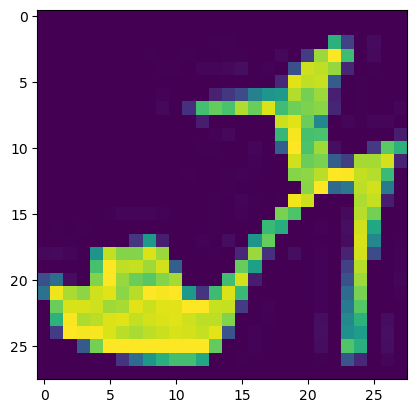

In [3]:
plt.imshow(x_train[9]) # Reading a single image

In [4]:
## Preprocessing the Data

In [5]:
x_train.max()

255

In [6]:
## Normalizing the data

In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
# Reshaping the array to include a 4th dimension

In [9]:
x_train = x_train.reshape(60000,28,28,1)

In [10]:
x_test = x_test.reshape(10000,28,28,1)

In [11]:
# Convertiong labels to be categorical

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_cat_train = to_categorical(y_train,10)

In [14]:
y_cat_test = to_categorical(y_test)

In [15]:
##Creating the model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [17]:
## to prevent dead Kernel
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [18]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss ='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [21]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),epochs=4)

Epoch 1/4
1875/1875 [==============================] - 28s 14ms/step - loss: 0.4157 - accuracy: 0.8530 - val_loss: 0.3284 - val_accuracy: 0.8813
Epoch 2/4
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2831 - accuracy: 0.8965 - val_loss: 0.3043 - val_accuracy: 0.8877
Epoch 3/4
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2383 - accuracy: 0.9122 - val_loss: 0.2799 - val_accuracy: 0.8970
Epoch 4/4
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2043 - accuracy: 0.9238 - val_loss: 0.2681 - val_accuracy: 0.9035


In [22]:
model.metrics_names

['loss', 'accuracy']

In [23]:
import pandas as pd


In [24]:
loses = pd.DataFrame(model.history.history)

<Axes: >

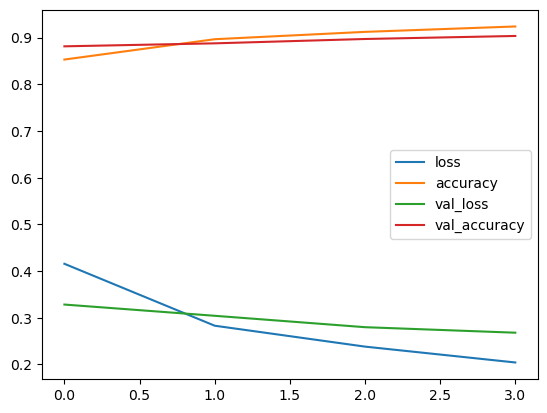

In [25]:
loses.plot()